In [2]:
!ls -la

total 12
drwxr-xr-x 3 root root 4096 Feb  5 07:30 .
drwxr-xr-x 5 root root 4096 Feb  5 07:29 ..
drwxr-xr-x 2 root root 4096 Feb  5 07:30 .virtual_documents


In [3]:
!ls /kaggle/input/luna16

annotations.csv  evaluationScript      subset0	subset3
candidates.csv	 sampleSubmission.csv  subset1	subset4
candidates_V2	 seg-lungs-LUNA16      subset2


In [4]:
!ls /kaggle/input/luna16/subset0/subset0

1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.122763913896761494371822656720.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.122763913896761494371822656720.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514.mhd
1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514.raw
1.3.6.1.4.1.14519.5.2.1.6279.6001.

In [5]:
# Source - https://stackoverflow.com/a/42594949
# Posted by savfod
# Retrieved 2026-02-05, License - CC BY-SA 3.0

import SimpleITK as sitk
import numpy as np
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing


ct_scan, origin, spacing = load_itk("/kaggle/input/luna16/subset0/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd")

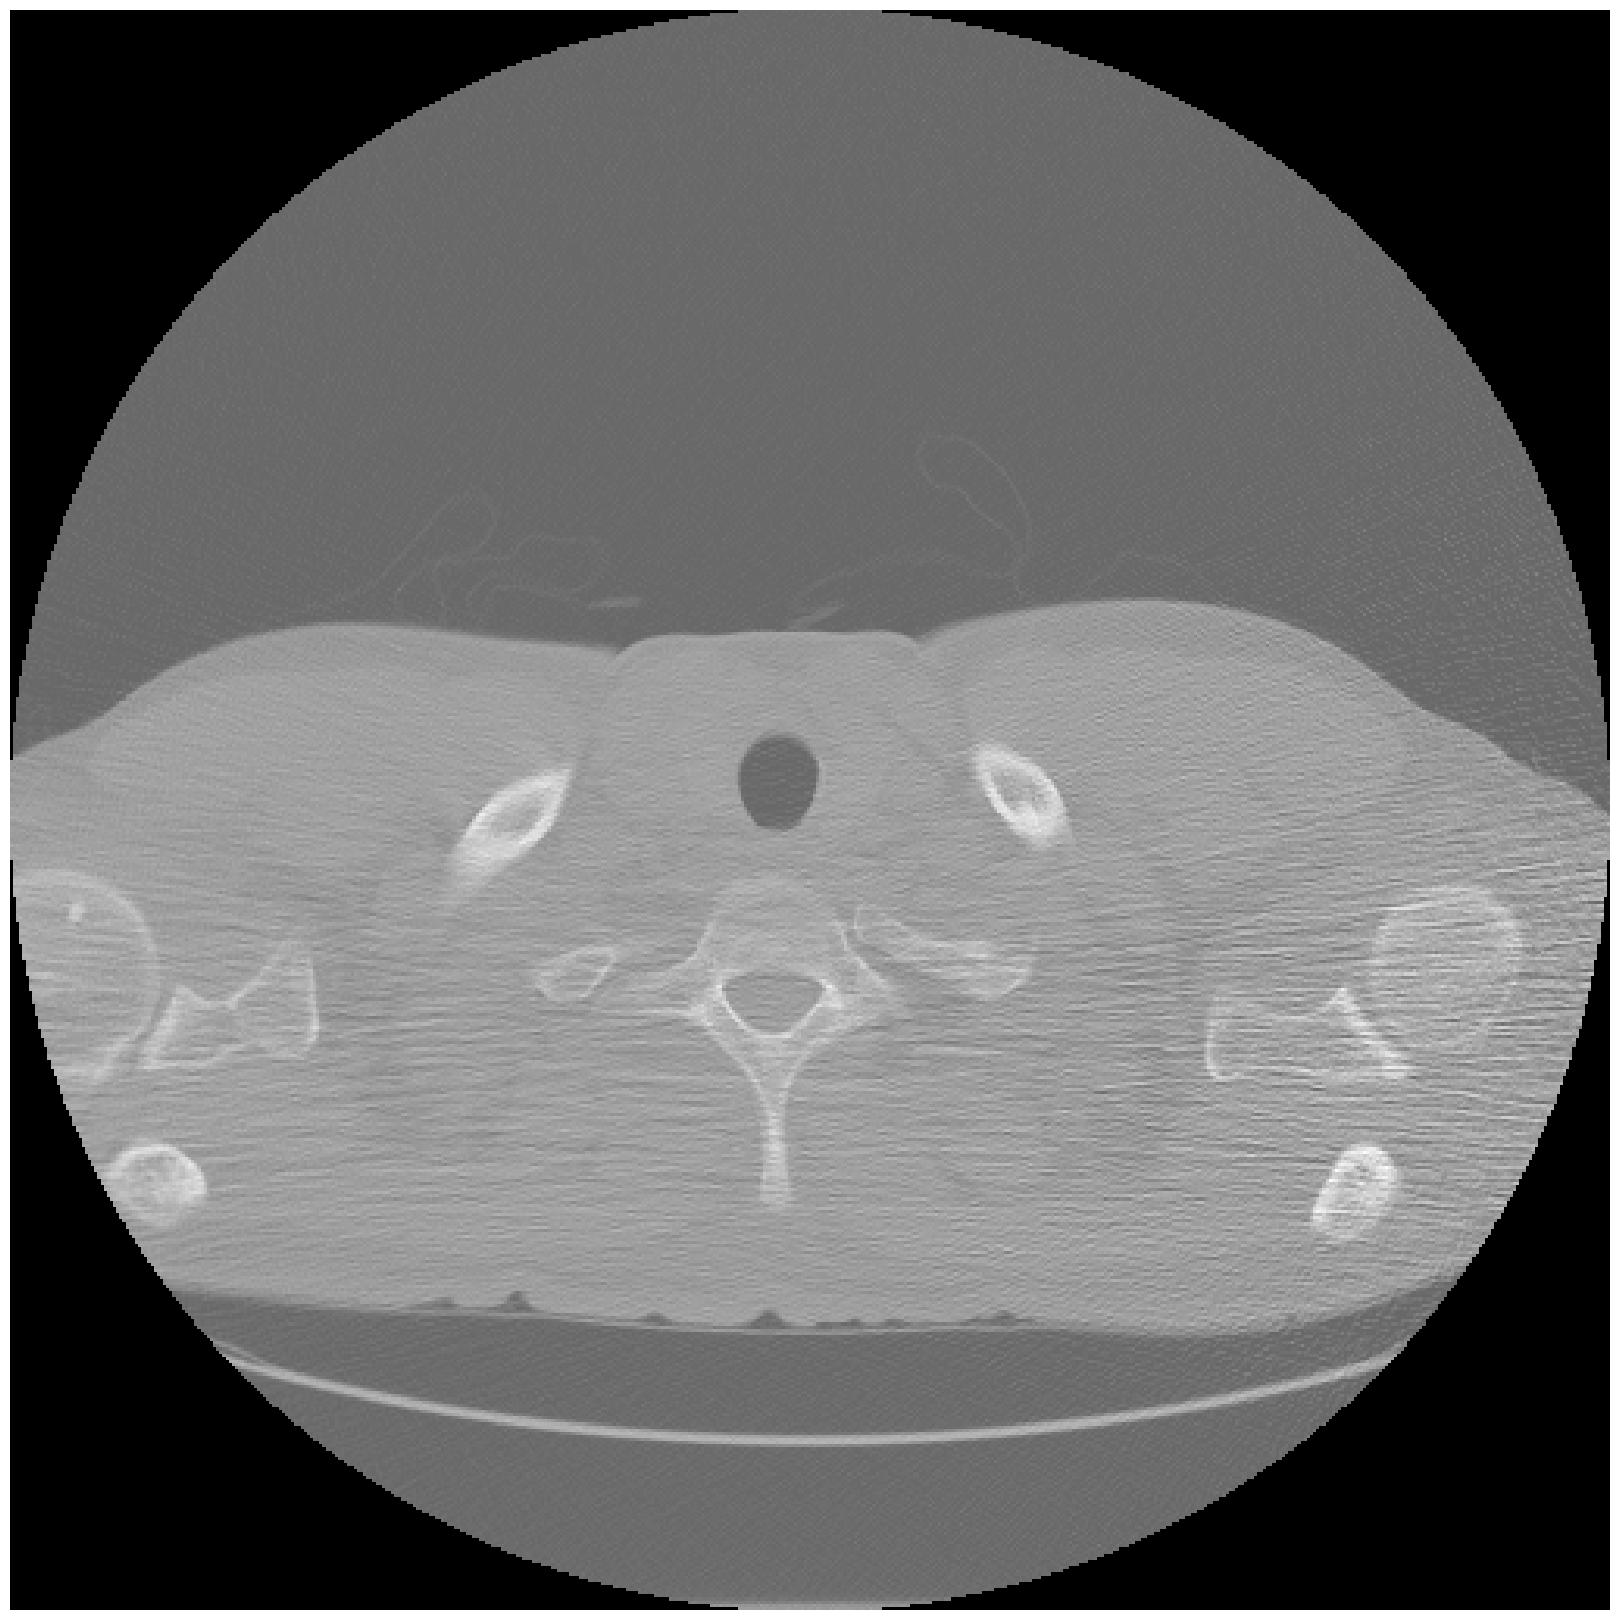

In [9]:
# Source - https://stackoverflow.com/a/57582860
# Posted by Sandipan Dey, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-05, License - CC BY-SA 4.0

import SimpleITK as sitk
import matplotlib.pylab as plt
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("/kaggle/input/luna16/subset0/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd", sitk.sitkFloat32))
plt.figure(figsize=(20,16))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(ct_scans.shape[0]):
    plt.imshow(ct_scans[i]), plt.axis('off')
    # use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
plt.show()


In [8]:
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.JPG")]
    frame_one = frames[0]
    frame_one.save("my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

from PIL import Image

ct_scan_pil = Image.fromarray(ct_scan)

TypeError: Cannot handle this data type: (1, 1, 512), <i2